In [7]:
import requests
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
# Specify the path to your .txt file
api_path = "../keys/api_key_youtube.txt"

api_key_number = 1

# Get api_key text
with open(api_path, 'r') as file:
    api_key = str(file.read()).split('\n')[api_key_number].split(':')[1].strip()

In [9]:
# Load videos dataframe
df_videos = pd.read_csv(f'../data/raw_data/df_video_data.csv')

# Get channel id not duplicated
channel_id_list = list(df_videos['channelId'].drop_duplicates())

In [10]:
channel_id_list[413]

'UCCeQ32Ia-07gh07Ee3cnl7Q'

# Get Channel Data

In [11]:
def get_channel_data(api_key, channel_id):
    url_channel = f'https://youtube.googleapis.com/youtube/v3/channels?part=snippet,contentDetails,statistics&id={channel_id}&key={api_key}'

    response = requests.get(url_channel).json()

    # Check if the response contains the channel data
    if 'items' in response and len(response['items']) > 0:
        item = response['items'][0]
        channel_data = {
            'channel_id': item['id'],
            'title': item['snippet']['title'],
            'description': item['snippet']['description'],
            'published_at': item['snippet']['publishedAt'],
            'subscriber_count': item['statistics'].get('subscriberCount'),
            'video_count': item['statistics'].get('videoCount'),
            'view_count': item['statistics'].get('viewCount')
        }
        if 'country' in item['snippet'].keys():
            channel_data['region'] = item['snippet']['country']
        else:
            channel_data['region'] = None
        return channel_data
    else:
        print("No channel data found.")
        return None

In [12]:
channel_data_list = [get_channel_data(api_key, id) for id in channel_id_list]

In [13]:
df_channel_data = pd.DataFrame(channel_data_list)
df_channel_data.to_csv('../data/raw_data/df_channel_data.csv', index=False)

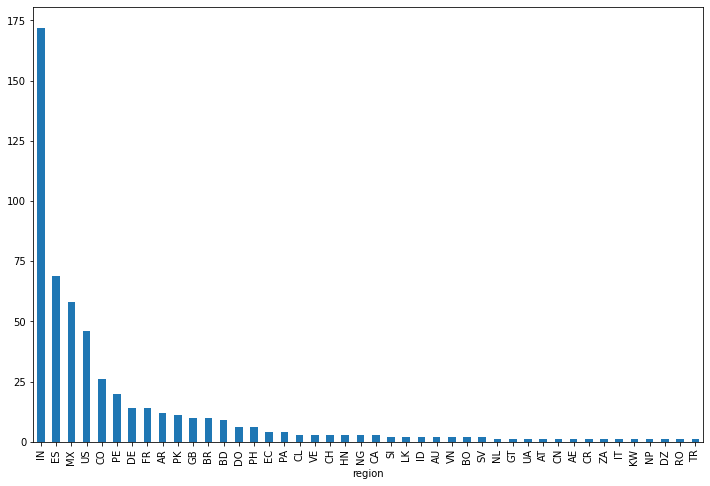

In [14]:
plt.figure(figsize=(12,8))
df_channel_data['region'].value_counts().plot(kind='bar')
plt.show();

# Get Commenters Channel Data

In [15]:
# Load video_comments datafram
df_comments = pd.read_csv('../data/df_comments_video.csv')
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165497 entries, 0 to 165496
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         165497 non-null  object 
 1   author             165497 non-null  object 
 2   author_channel_id  165497 non-null  object 
 3   text               165497 non-null  object 
 4   like_count         165497 non-null  int64  
 5   published_at       165497 non-null  object 
 6   updated_at         165497 non-null  object 
 7   total_reply_count  165497 non-null  float64
 8   video_id           165497 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ MB


In [16]:
commenters_id_list = list(df_comments['author_channel_id'].drop_duplicates())